# Import data

In [2]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [5]:
#Load data from csv and store it in a dataframe
data = pd.read_csv("haberman.csv") #We can change this database

In [6]:
# We show the first individuals
data.head() # Return the first n rows

,Age,Year_of_op,Nbr_of_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


- Age = Age of patient at time of operation (numerical)
- Year_of_op = Patient's year of operation (year - 1900, numerical)
- Nbr_of_nodes = Number of positive axillary nodes detected (numerical)
- Surv_status = Survival status (class attribute); 1 = the patient survived 5 years or longer, 2 = the patient died within 5 year

# Data set description

In [7]:
print(data.shape)

(306, 4)


In [10]:
data.dtypes

Age             int64
Year_of_op      int64
Nbr_of_nodes    int64
Surv_status     int64
dtype: object

All the values of the dataset are integers.

In [12]:
data.columns

Index(['Age', 'Year_of_op', 'Nbr_of_nodes', 'Surv_status'], dtype='object')

# Statistics

In [13]:
data.describe()

,Age,Year_of_op,Nbr_of_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [15]:
print(data.nunique())

Age             49
Year_of_op      12
Nbr_of_nodes    31
Surv_status      2
dtype: int64


In [20]:
data["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

Because there is different amount of values one and two in survival status column, we have to construt the training data the way that there is same amount of values one and two in training dataset. Because in other case our model will classify value one more often than value two.

# Analyse

### Histograms

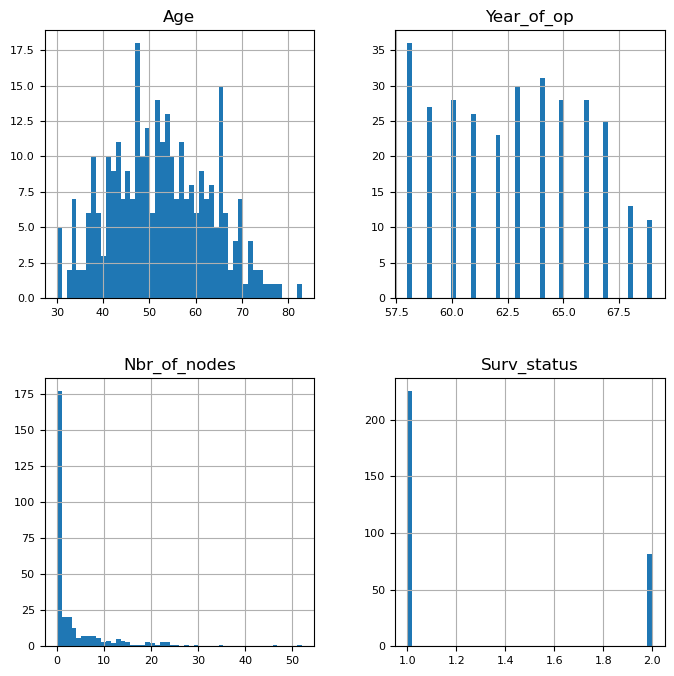

In [31]:
data.hist(figsize=(8, 8), bins=50, xlabelsize=8, ylabelsize=8); 

From the figures above we can see that:
- Age variable is more or less normally distributed with mean 52 years and standard deviation 10 years. 
- Year of operation is more uniformly distributed variable whom range is from 58 to 69 years. 
- From the distribution of Number of nodes variable we can see that in most of cases number of positive axillary nodes detected has been lower than 5.
- From the distribution of Survival status variable we can see that majority of patients have survived 5 or more years after surgery.

<AxesSubplot: title={'center': 'Age'}>

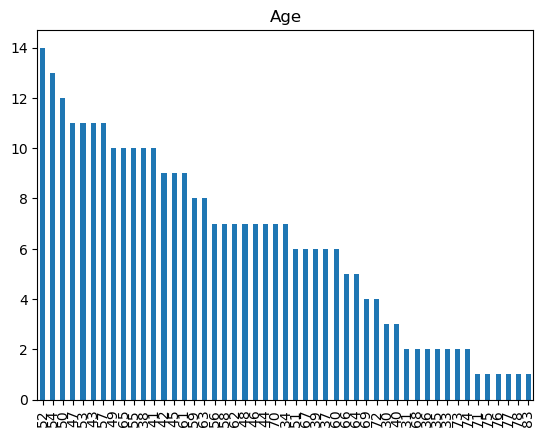

In [32]:
data['Age'].value_counts().plot.bar(title="Age")

<AxesSubplot: title={'center': 'Year of the operation'}>

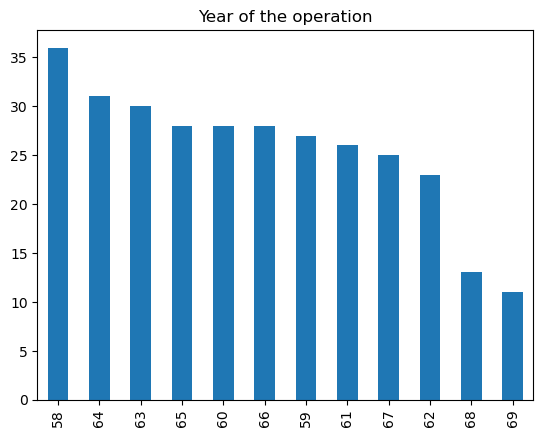

In [33]:
data['Year_of_op'].value_counts().plot.bar(title="Year of the operation")

<AxesSubplot: title={'center': 'Number of nodes'}>

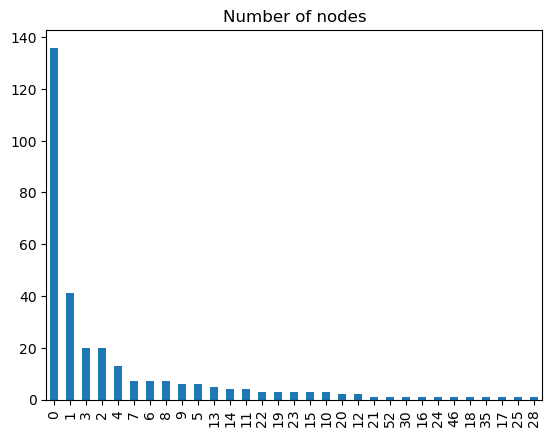

In [34]:
data['Nbr_of_nodes'].value_counts().plot.bar(title="Number of nodes")

<AxesSubplot: title={'center': 'Survival status'}>

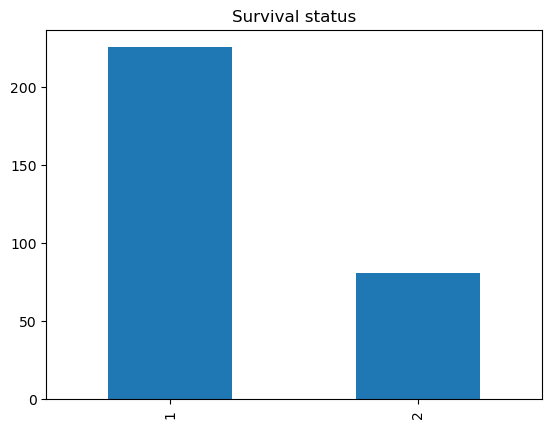

In [35]:
data['Surv_status'].value_counts().plot.bar(title="Survival status")

# Boxplots

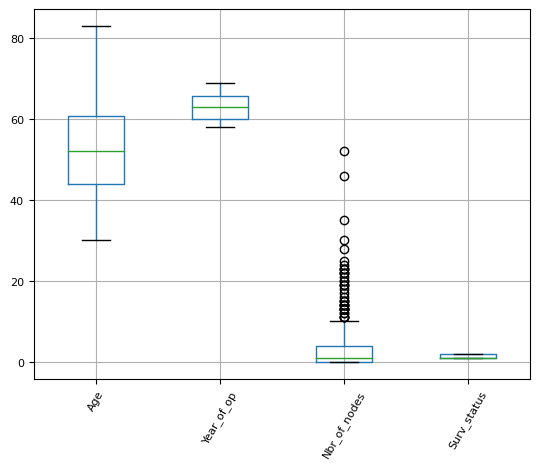

In [36]:
boxplot = data.boxplot(grid=True, rot=60, fontsize=8)

From this figure we can search the outliers of the data. The only variable where we can notice outliers seems to be Number of nodes. When investigating more precisely those outliers we can see that some of them has value over 30 and even over 40. Because in total human has 20-30 axillary nodes it is only possible to have max. 20-30 cancer cell positive axillary nodes. Because of that all the outliers with a value over 30 should be wrong values so when cleaning the data we should remove or fill those values with another value. In the section Cleaning data we will investigate the right method to handel those outliers.

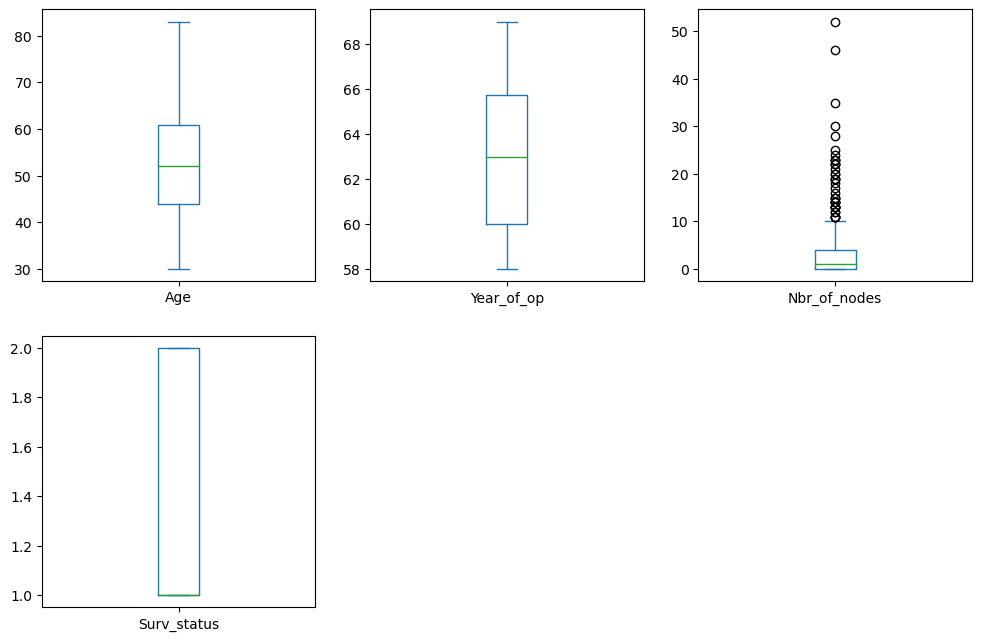

In [37]:
data.plot(kind='box',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

# Scatter plots

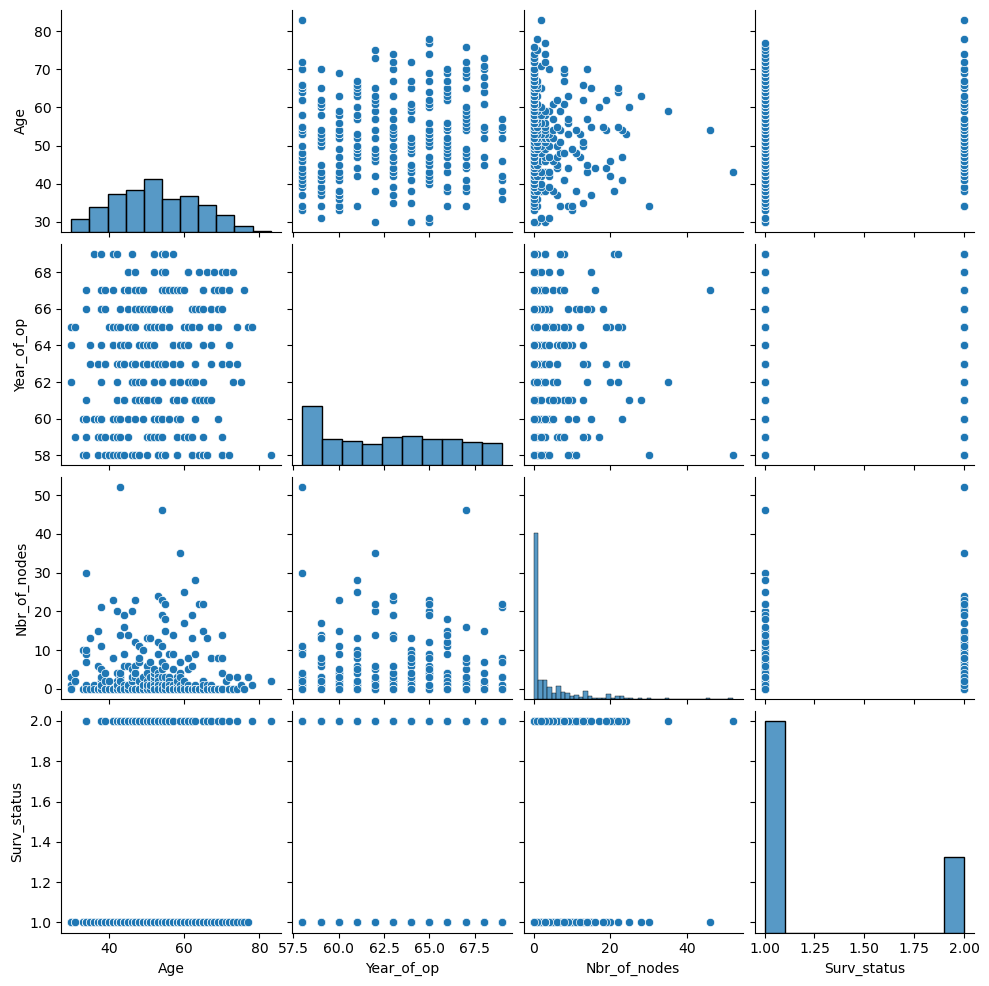

In [38]:
sns.pairplot(data)

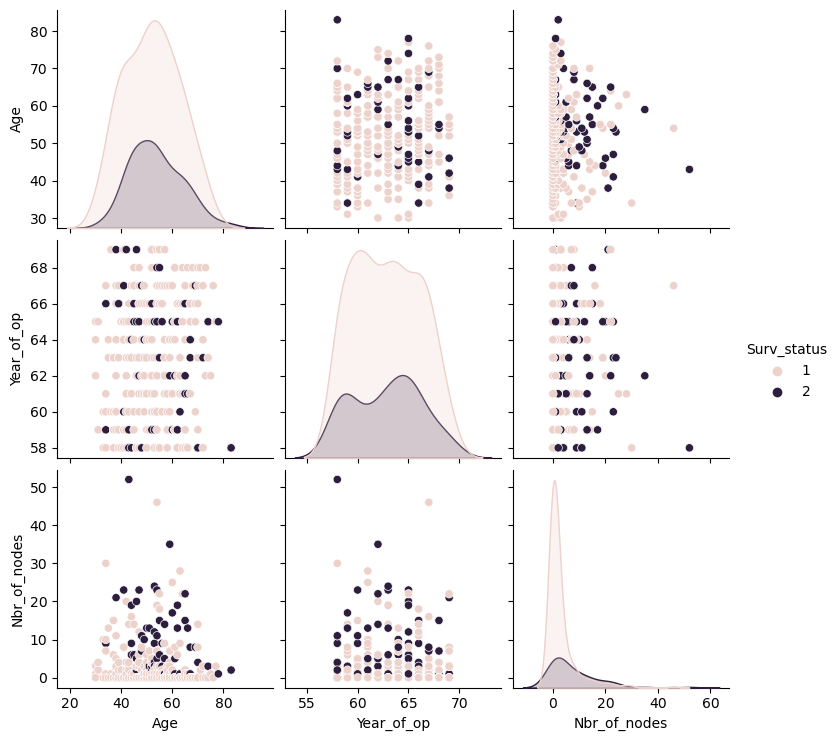

In [39]:
sns.pairplot(data, hue = 'Surv_status')

# Grouping

In [41]:
data.groupby(['Surv_status', 'Age']).mean() 

Year_of_op  Nbr_of_nodes
Surv_status Age                          
1           30    63.666667      1.333333
            31    62.000000      3.000000
            33    59.000000      5.000000
            34    61.200000      9.600000
            35    63.500000      6.500000
...                     ...           ...
2           70    58.000000      2.000000
            72    63.000000      0.000000
            74    65.000000      3.000000
            78    65.000000      1.000000
            83    58.000000      2.000000

[81 rows x 2 columns]

# Dealing with missing values

In [42]:
data.isnull().sum()

Age             0
Year_of_op      0
Nbr_of_nodes    0
Surv_status     0
dtype: int64

In [43]:
(data == 0).sum(axis=0)

Age               0
Year_of_op        0
Nbr_of_nodes    136
Surv_status       0
dtype: int64

No missing values in our case

 # Outliers